<a href="https://colab.research.google.com/github/AnaghaSreenath/ML-lab/blob/main/Untitled9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Dataset shape: (14780, 28, 28) (14780,)
Train shape: (11824, 784)
Validation shape: (2956, 784)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



✅ Validation Accuracy: 0.9980

Confusion Matrix:
[[1380    1]
 [   5 1570]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1381
           1       1.00      1.00      1.00      1575

    accuracy                           1.00      2956
   macro avg       1.00      1.00      1.00      2956
weighted avg       1.00      1.00      1.00      2956



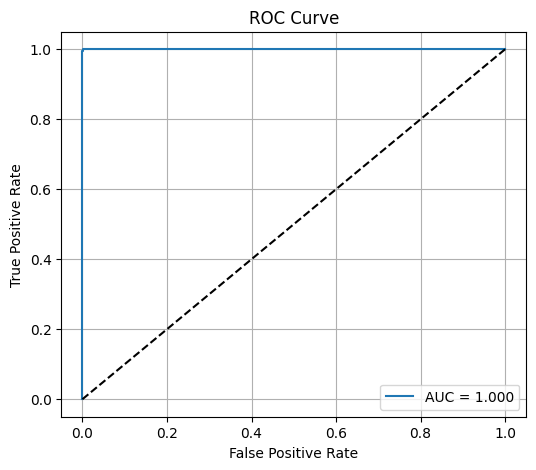

Number of misclassified samples: 6


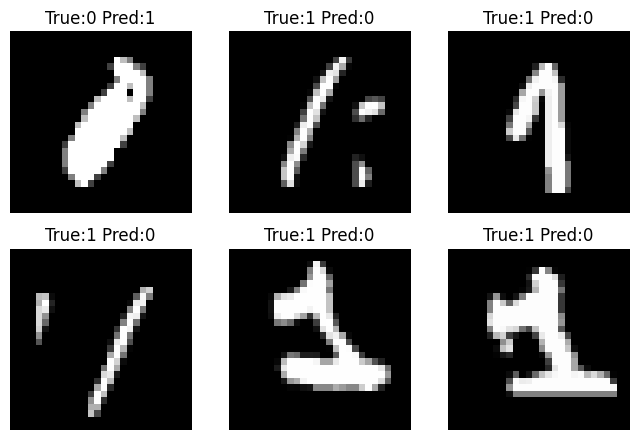

In [1]:
# ===========================
# Logistic Regression on MNIST (0 vs 1)
# ===========================

# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)
from tensorflow import keras

# Step 2: Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Combine train and test for simplicity
X_all = np.concatenate([x_train, x_test], axis=0)
y_all = np.concatenate([y_train, y_test], axis=0)

# Step 3: Select only digits 0 and 1 for binary classification
digit_a = 0
digit_b = 1
mask = (y_all == digit_a) | (y_all == digit_b)
X = X_all[mask]
y = y_all[mask]

# Convert labels: digit_a -> 0, digit_b -> 1
y = (y == digit_b).astype(int)

print("Dataset shape:", X.shape, y.shape)

# Step 4: Flatten 28x28 images into 784 features and scale
N = X.shape[0]
X_flat = X.reshape(N, -1).astype(np.float32)
X_flat /= 255.0  # normalize pixel values

# Optional: standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_flat)

# Step 5: Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)

# Step 6: Train Logistic Regression model
clf = LogisticRegression(
    solver='saga', penalty='l2', max_iter=200, C=1.0,
    random_state=42, n_jobs=-1
)
clf.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = clf.predict(X_val)
acc = accuracy_score(y_val, y_pred)
print(f"\n✅ Validation Accuracy: {acc:.4f}")

# Step 8: Detailed evaluation metrics
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Step 9: ROC Curve and AUC
y_prob = clf.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_prob)
fpr, tpr, _ = roc_curve(y_val, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# Step 10: Visualize some misclassified images
mis_idx = np.where(y_val != y_pred)[0]
print(f"Number of misclassified samples: {len(mis_idx)}")

plt.figure(figsize=(8,8))
for i in range(min(9, len(mis_idx))):
    idx = mis_idx[i]
    img = X_val[idx].reshape(1, -1)
    img_unscaled = (scaler.inverse_transform(img) * 255.0).clip(0,255)
    plt.subplot(3,3,i+1)
    plt.imshow(img_unscaled.reshape(28,28), cmap='gray')
    plt.title(f"True:{y_val[idx]} Pred:{y_pred[idx]}")
    plt.axis('off')
plt.show()
